### Seaborn的组合图表
seaborn可以非常便捷的将各种图表组合起来，如在上一章使用row和col参数可以非常快速的根据数据生成多个图表；

除此之外在seaborn还有集中特殊的组合图表：facetplot、pariplot、jointplot

但在此之前，我们可以先来学习如何将seaborn的图表快速添加的plt.subplots中去

### 多子图
在之前的内容中我们讲到了seaborn的图表层级，axes-level图表是可以添加到matplotlib的复杂figure中的，seaborn中的axes-level都有添加一个ax参数用于指定在figure中的绘图位置；

如下面代码中，我们通过plt.subplots()创建一个1行2列的figure，我们可以非常便捷的将seaborn的图表添加进去；

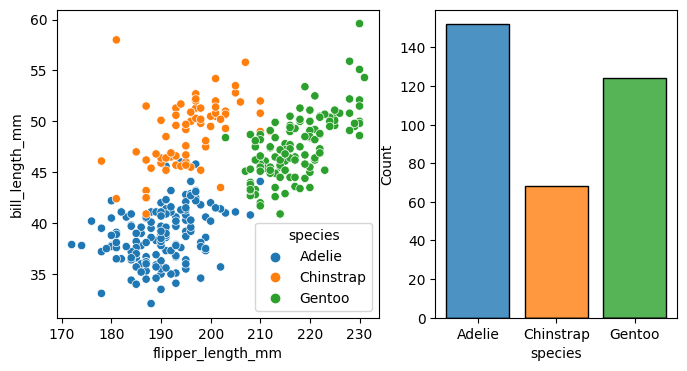

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
penguins = sns.load_dataset("penguins", data_home='seaborn_sample')

f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3])) 
# width_ratios 参数指定了两个子图的宽度比例。
sns.scatterplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", ax=axs[0])
sns.histplot(data=penguins, x="species", hue="species", shrink=.8, alpha=.8, legend=False, ax=axs[1])
# f.tight_layout()
plt.show()

<Axes: xlabel='species', ylabel='bill_length_mm'>

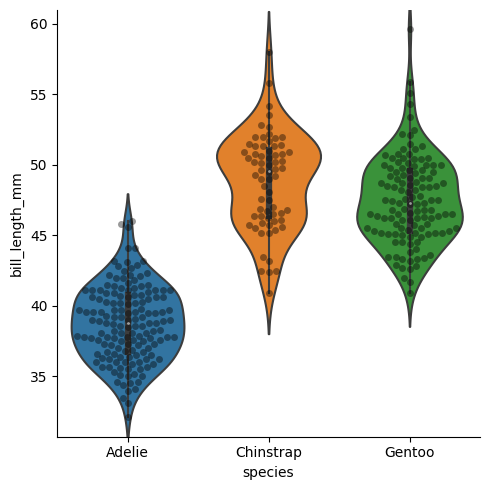

In [6]:
g = sns.catplot(data=penguins, x="species", y='bill_length_mm', kind='violin', alpha=.4)
sns.swarmplot(data=penguins, x="species", y='bill_length_mm', color='k', alpha=.4, ax=g.ax)

### 组合图表
将较于通过plt.subplots()创建多子图，seaborn也提供了3种方式绘制多子图——FacetGrid、PairGrid和JointGrid；

FacetGrid
与subplots创建的子图不一样的是，FacetGrid相当于是依据数据集中的维度字段快速的将一份图表复制多份，如下，我们可以在现有散点图的结构之下，再添加一个sex的维度：

<Axes: xlabel='flipper_length_mm', ylabel='bill_length_mm'>

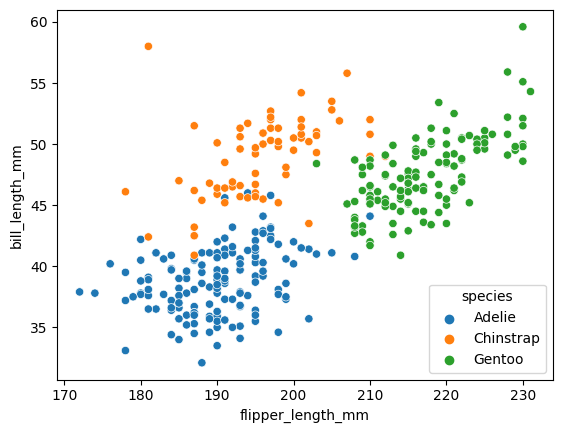

In [7]:
sns.scatterplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

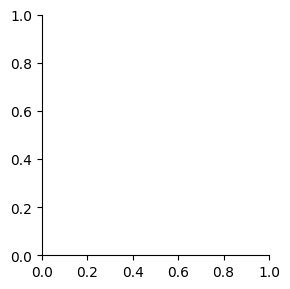

In [8]:
# sns.FacetGrid会创建一个空的坐标系；
g = sns.FacetGrid(penguins)

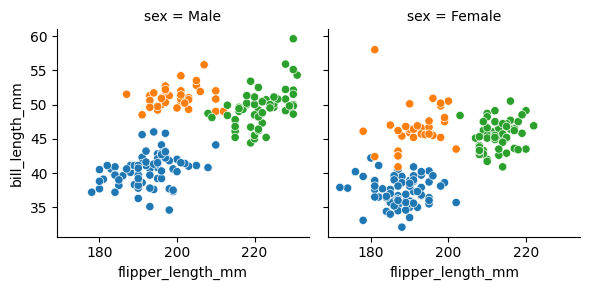

In [10]:
# 当我们添加一个sex维度，并通过列（col）去进行展示时，就会变成两个坐标系；
g = sns.FacetGrid(penguins, col='sex')
# 我们需要做的便是将数据填充进去，通过g.map分别制定x、y、hue对应的数据列名称；
g.map(sns.scatterplot, "flipper_length_mm", "bill_length_mm", "species")

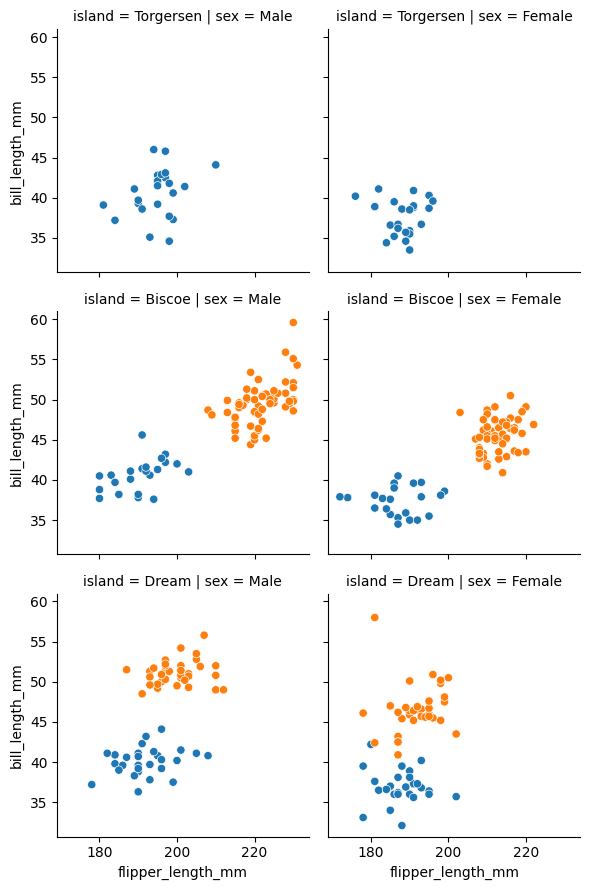

In [11]:
g = sns.FacetGrid(penguins, col='sex', row='island')
g.map(sns.scatterplot, "flipper_length_mm", "bill_length_mm", "species")

通过参数height，aspect修改画布的尺寸；

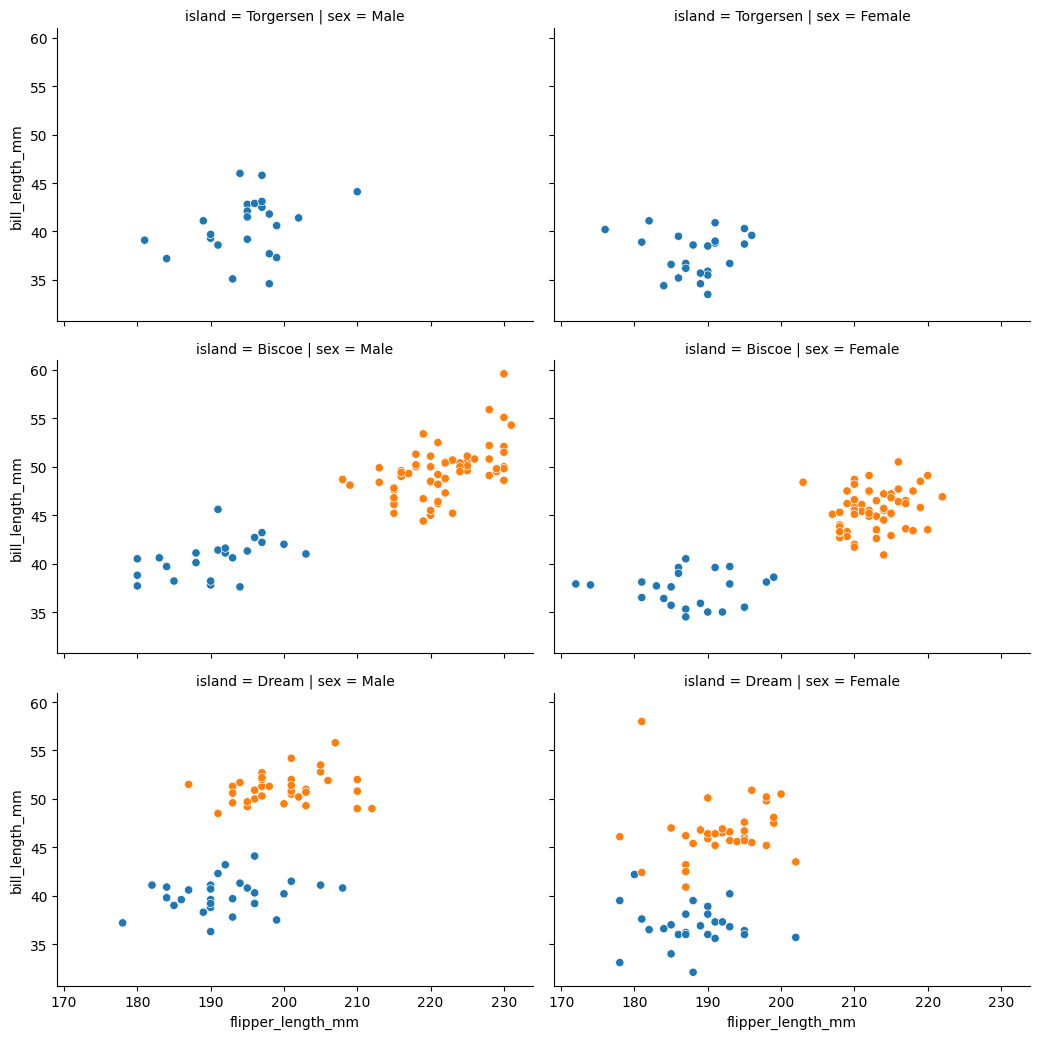

In [13]:
g = sns.FacetGrid(penguins, col='sex', row='island', height=3.5, aspect=1.5)
g.map(sns.scatterplot, "flipper_length_mm", "bill_length_mm", "species")

#### PairGrid
FacetGrid是根据数据集的维度去创建多个图表的话，那么PairGrid就是根据数据集中的度量字段去生成多个坐标系；

我们同样还是使用相同的数据集：

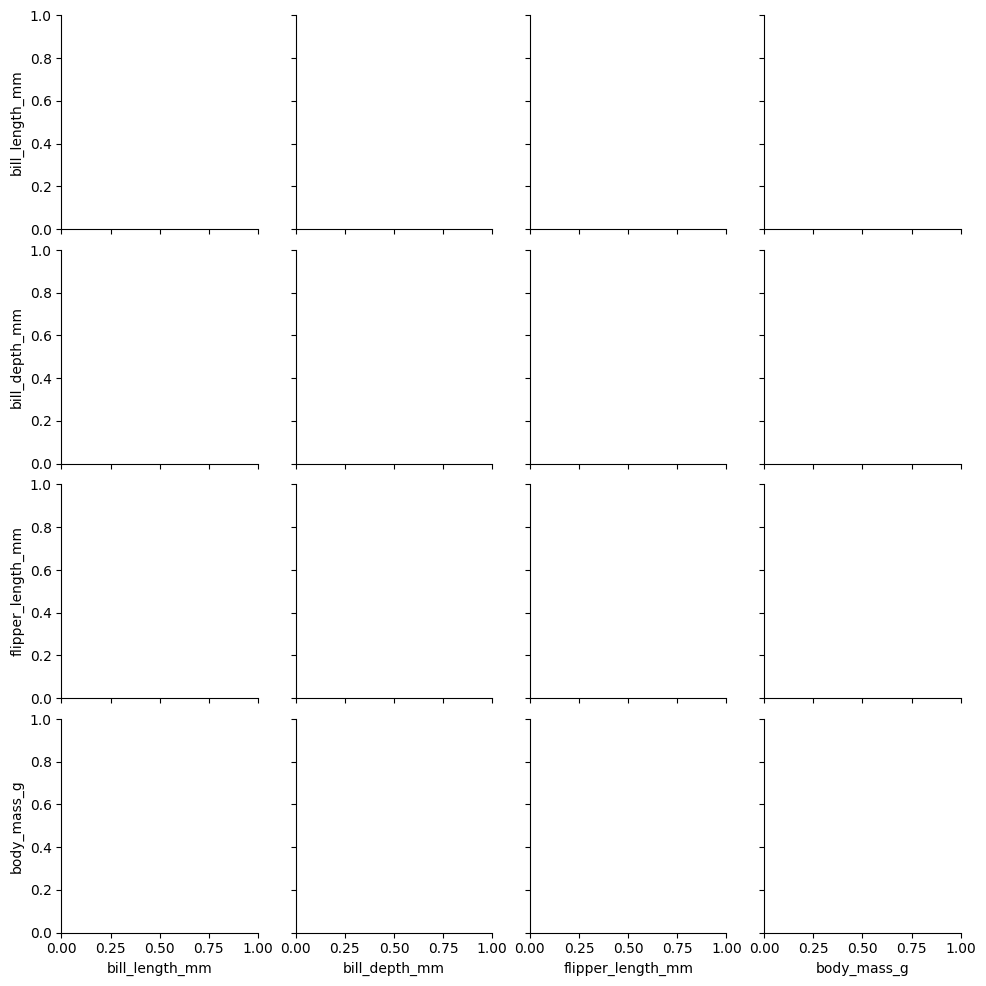

In [14]:
g = sns.PairGrid(penguins)
# 总共会生成4*4个坐标系，为什么是4，因为我们的数据集中有4个度量的字段；

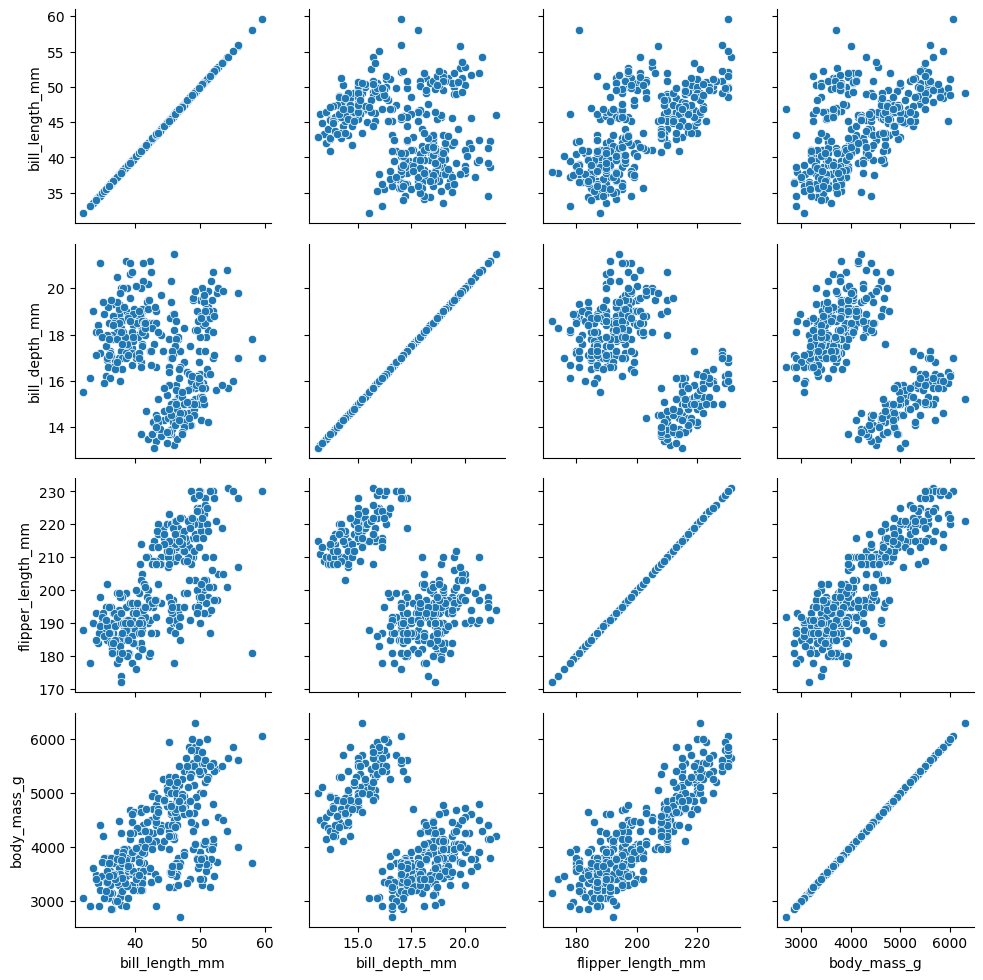

In [17]:
g = sns.PairGrid(penguins)
g.map(sns.scatterplot)

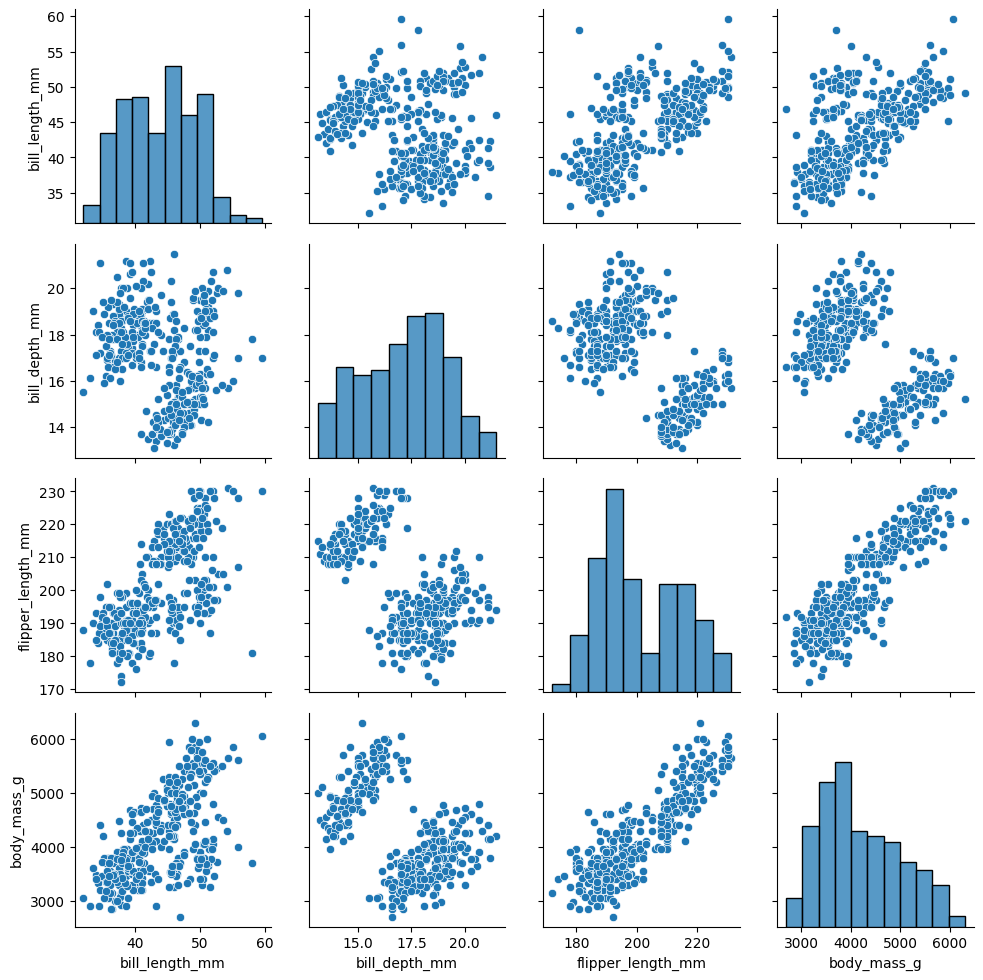

In [16]:
g = sns.PairGrid(penguins)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
# 当然我们也可以通过map_diag和map_offdiag去指定对角线的图表和非对角线的图表；

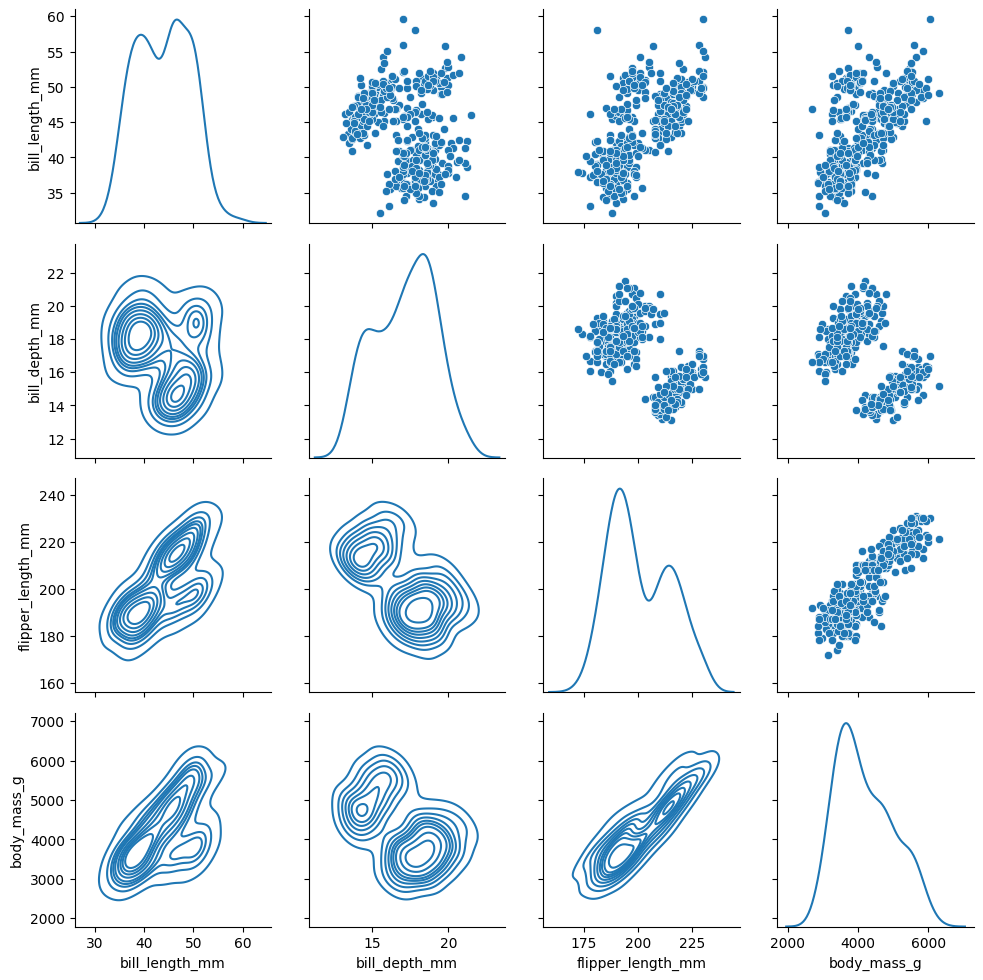

In [19]:
g = sns.PairGrid(penguins, diag_sharey=False)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot)

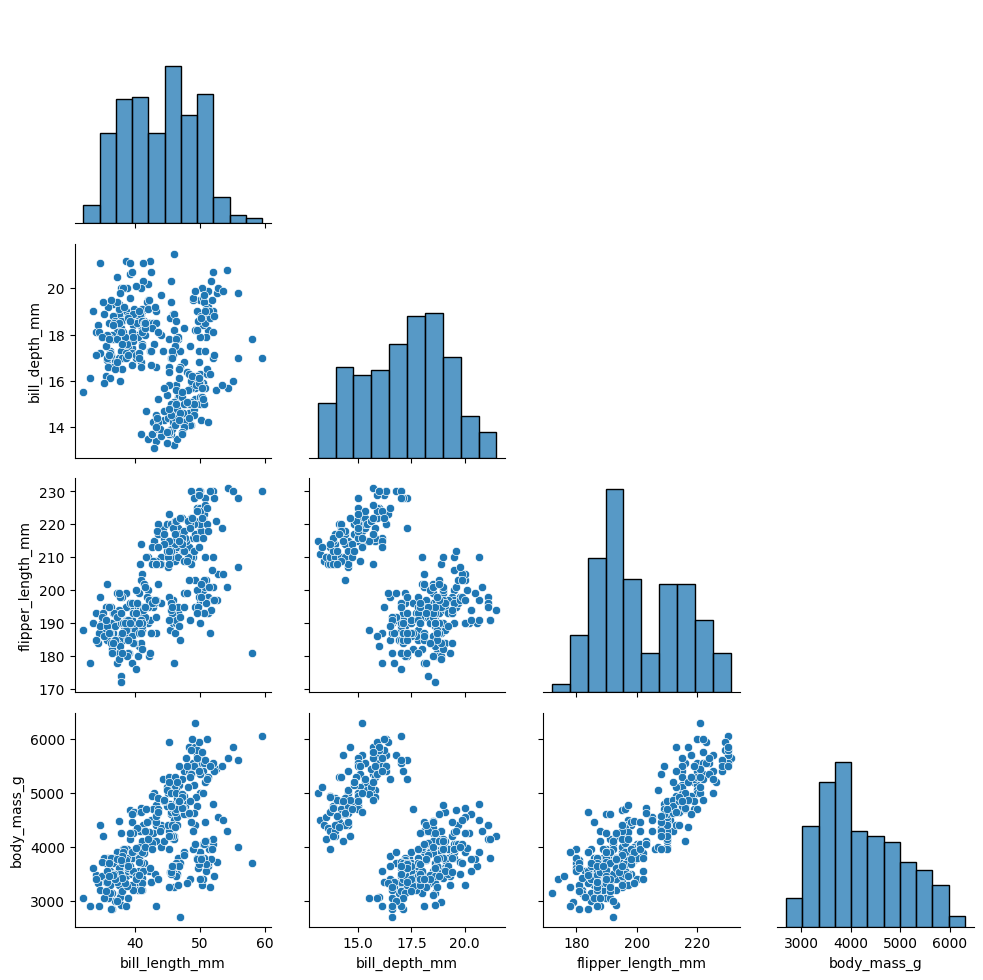

In [22]:
# 一侧留白
g = sns.PairGrid(penguins, corner=True)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

我们也还可以添加一些维度进去，如果是需要对所有图表生效的通过PairGrid中的参数设置，其余的在对应的图表中添加数据即可；

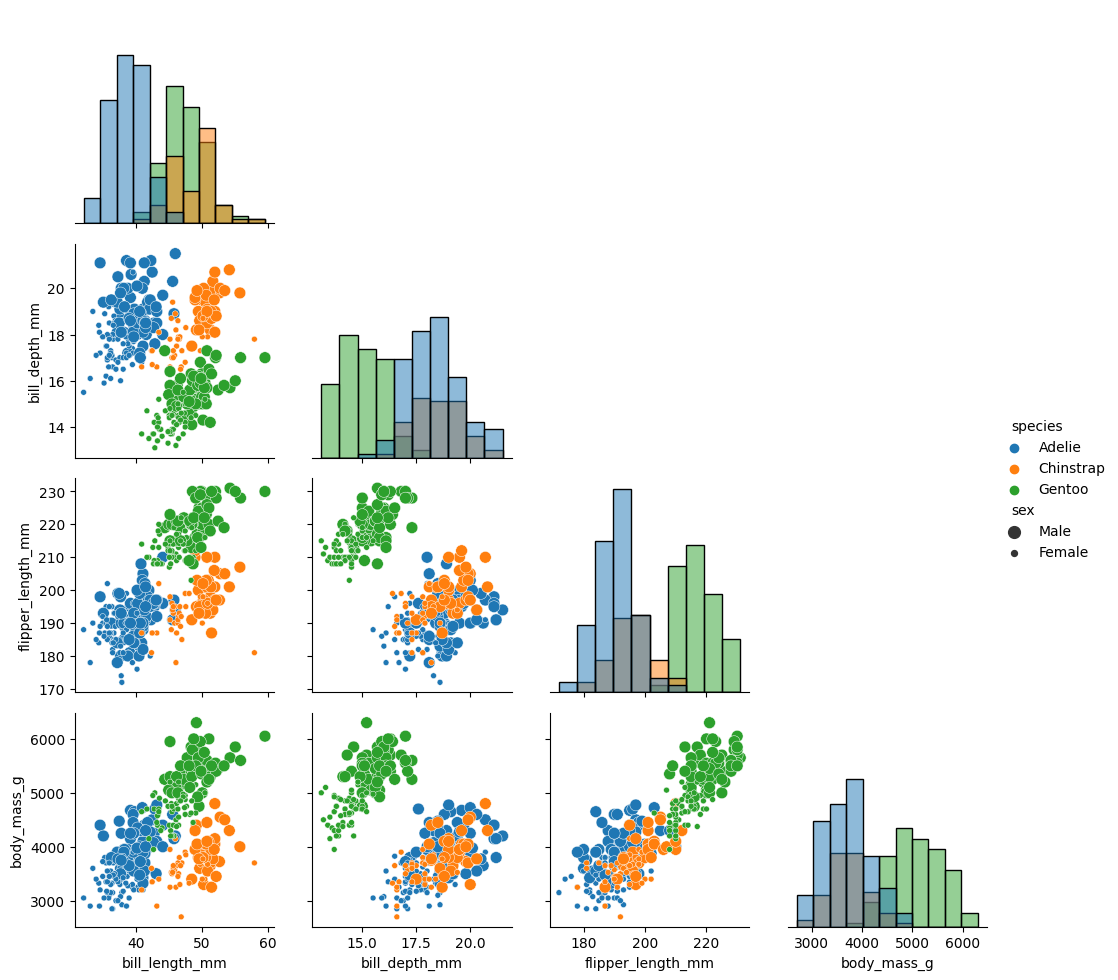

In [23]:
g = sns.PairGrid(penguins, corner=True,  hue="species")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot, size=penguins.sex)
g.add_legend(title="", adjust_subtitles=True)

#### JointGrid
JointGrid创建的多图是一张主图，然后在上方和右侧边缘区域添加图表用于展示单变量的分布情况；

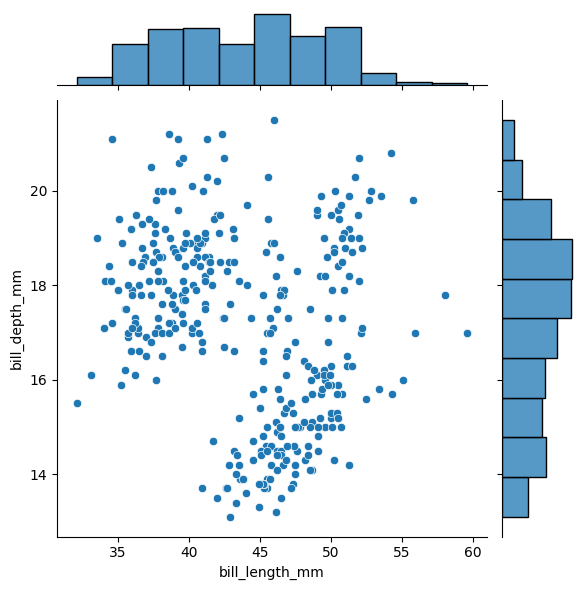

In [27]:
g = sns.JointGrid(data=penguins, x="bill_length_mm", y="bill_depth_mm")
g.plot(sns.scatterplot, sns.histplot)

如果我们希望正对不同的图表传递不同的参数时，g.plot就不够用了；

这时候我们可以通过g.plot_joint() 、g.plot_marginals()去分别绘制中心区域和边缘区域图表；

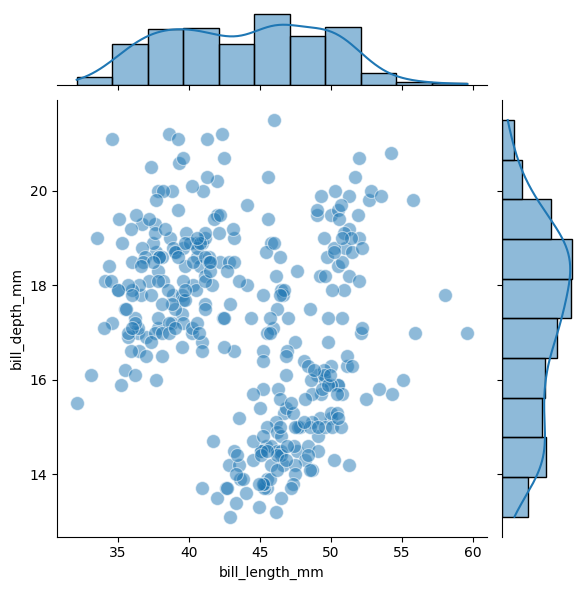

In [28]:
g = sns.JointGrid(data=penguins, x="bill_length_mm", y="bill_depth_mm")
g.plot_joint(sns.scatterplot, s=100, alpha=.5)
g.plot_marginals(sns.histplot, kde=True)

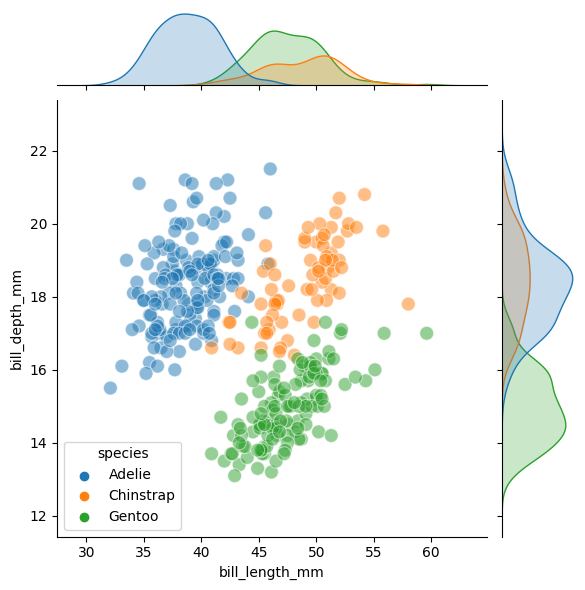

In [29]:
g = sns.JointGrid(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue='species')
g.plot_joint(sns.scatterplot, s=100, alpha=.5)
g.plot_marginals(sns.kdeplot, fill=True)

PairPlot和JointPlot
为方便快速调用，PairGrid和JointGrid都是figure-levle的图表：PairPlot和JointPlot;

通过命名方式也能看出来，PairGrid和JointGrid是创建的坐标系，然后需要去绑定数据，PairPlot和JointPlot是直接完成图表的绘制；

如果我们需求比较复杂，我们可以通过PairGrid和JointGrid完成更多定制化的需求，不然还是推荐使用PairPlot和JointPlot

#### PairPlot
PairPlot会自动根据数据集中的度量字段自动生成图表，而不需要我们依次去绑定数据；

默认对角线是使用直方图，两侧散点图；

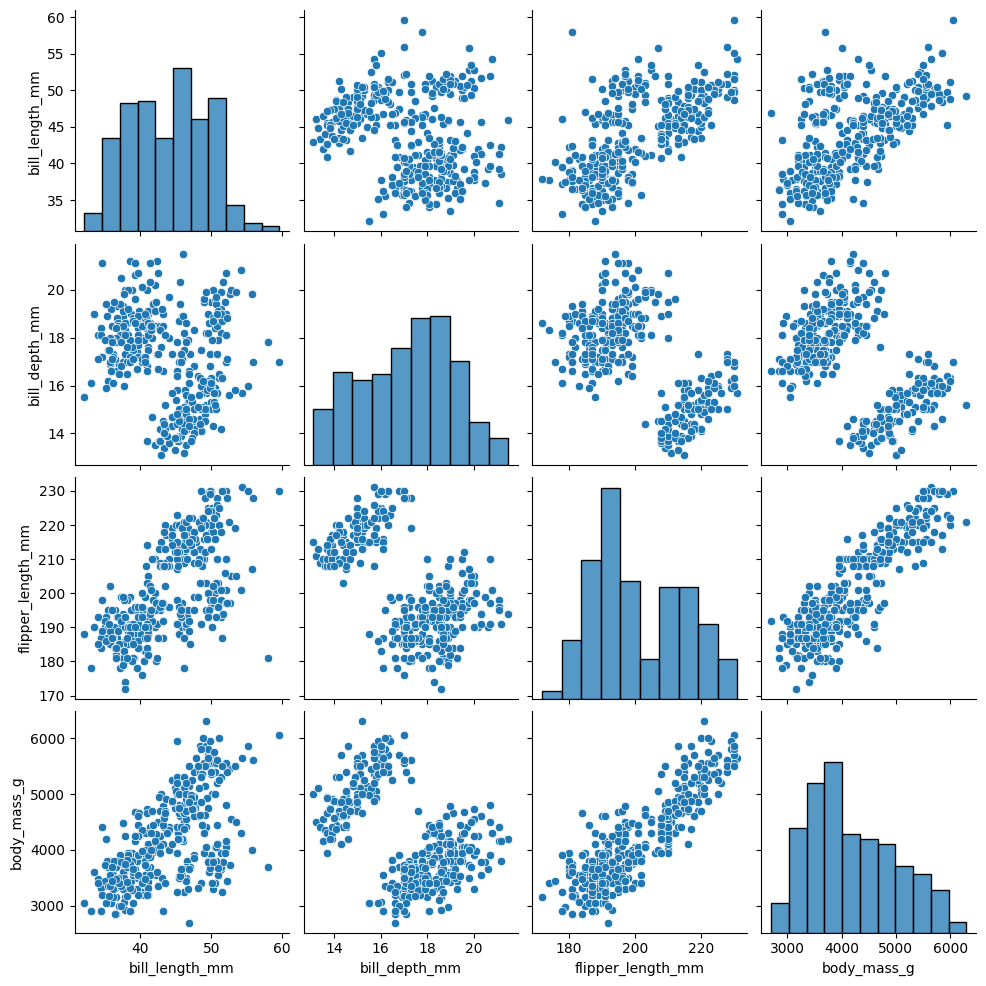

In [30]:
g = sns.pairplot(penguins)

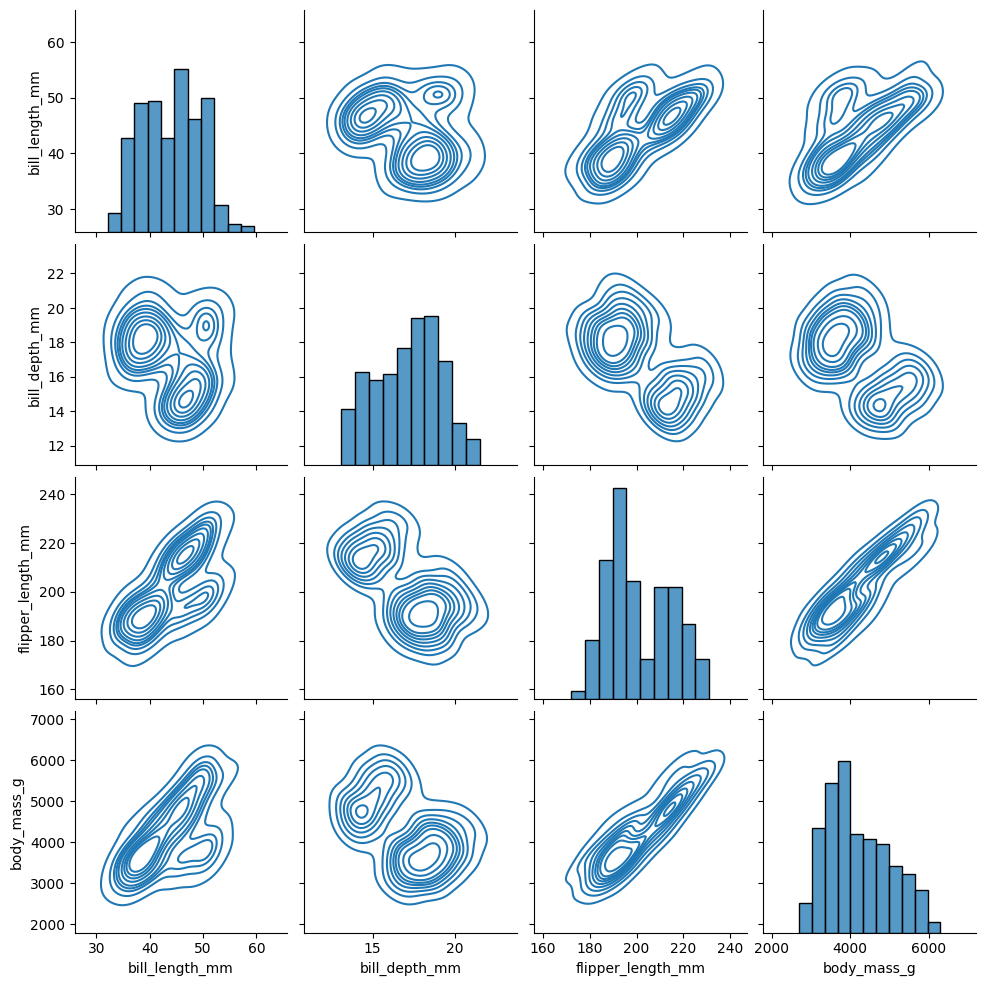

In [31]:
g = sns.pairplot(penguins, diag_kind="hist", kind='kde')

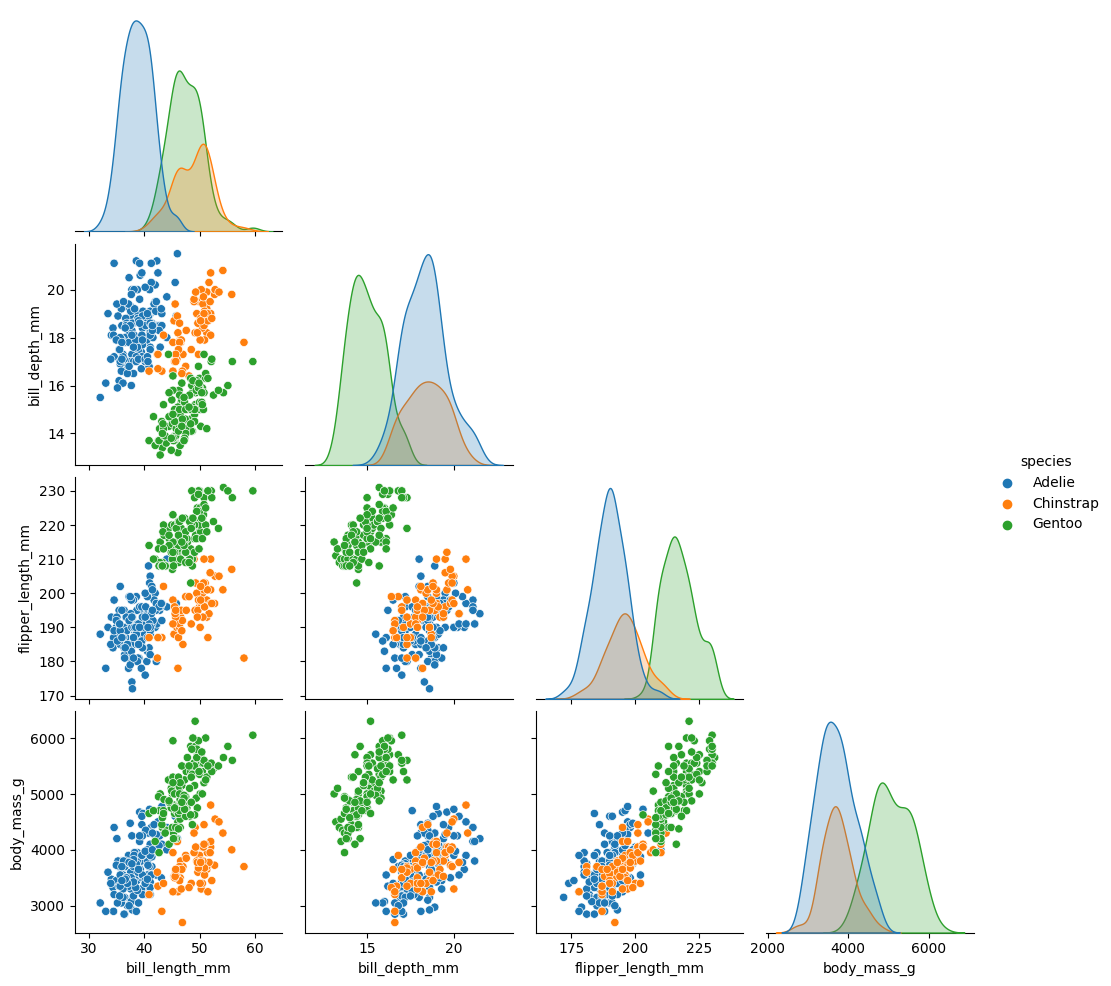

In [32]:
g = sns.pairplot(penguins, hue='species', corner=True)

#### JointPlot
如PairPlot一样，JointPlot一样也会根据数据集的度量字段自动生成图表，而不需要依次去指定；

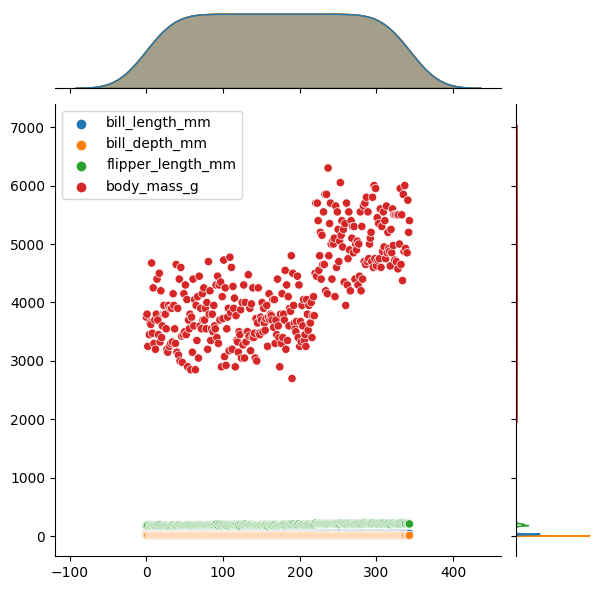

In [33]:
sns.jointplot(data=penguins)

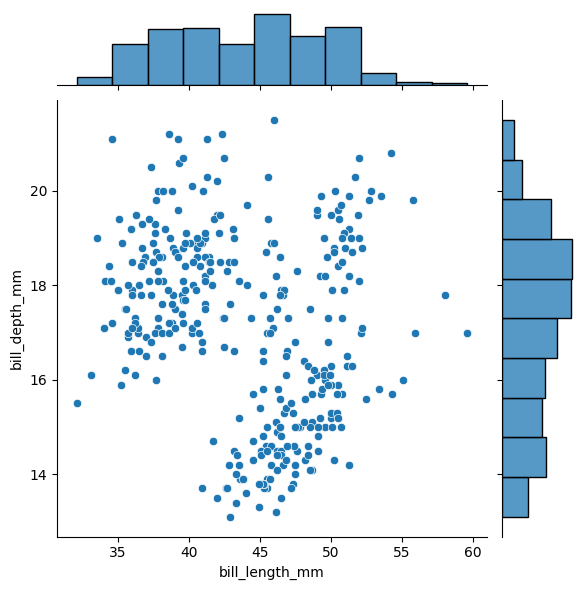

In [34]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

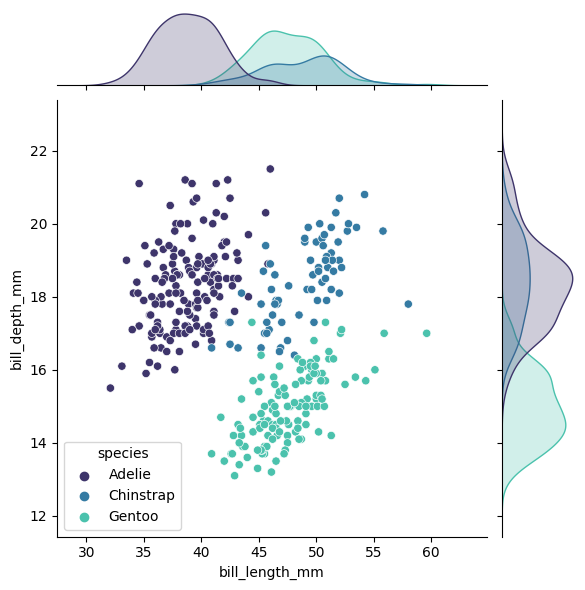

In [35]:
sns.jointplot(data= penguins, x="bill_length_mm", y="bill_depth_mm", hue='species', palette='mako')

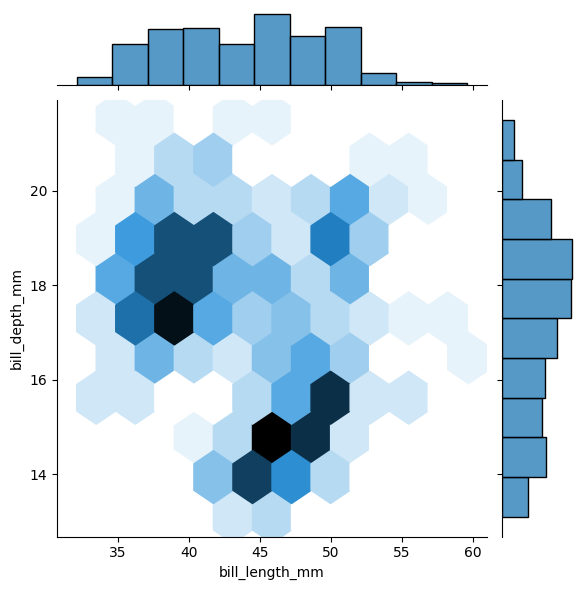

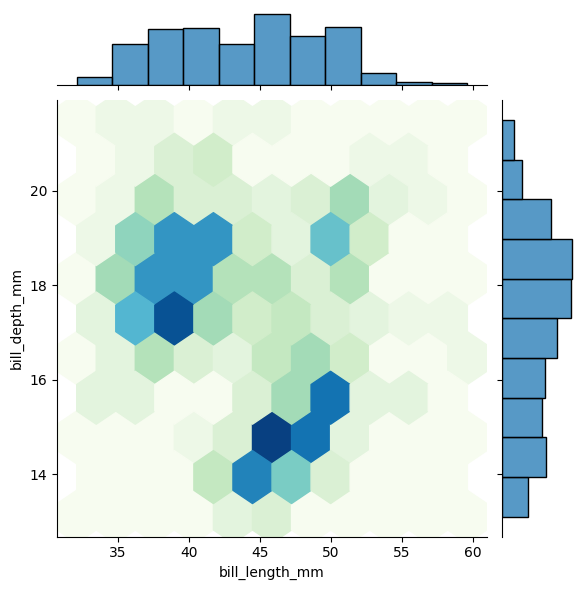

In [37]:
# 通过 kind参数切换图表类型
sns.jointplot(data= penguins, x="bill_length_mm", y="bill_depth_mm", kind='hex')
# kind='hex'：指定图的类型为六边形图 (hexbin plot)，用六边形的颜色深浅表示点的密度。

# 改变配色
sns.jointplot(data= penguins, x="bill_length_mm", y="bill_depth_mm", kind='hex', cmap='GnBu')